<a href="https://colab.research.google.com/github/fran080702/Proyecto-Actualizacion-Causas/blob/main/Causas_Pendientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("ggplot2")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



New names:
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`


[1] "Archivo XLSX cargado correctamente. Primeras filas:"
Rows: 20,781
Columns: 25
$ COD_CORTE     <dbl> 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, …
$ CORTE         <chr> "C.A. de Valparaíso", "C.A. de Valparaíso", "C.A. de Val…
$ ROL           <dbl> 22, 9, 2, 1, 2, 3, 4, 19, 1, 6, 25, 46, 2277, 98990, 519…
$ AÑO_ROL       <dbl> 2014, 2015, 2017, 2017, 2018, 2019, 2019, 2020, 2020, 20…
$ LIBRO         <chr> "Ministro 1° instancia-Ant", "Ministro 1° instancia-Ant"…
$ FECHA_INGRESO <chr> "2014-12-16", "2015-12-14", "2017-08-16", "2017-08-16", …
$ GLS_SALA      <chr> "Tercera", "Tercera", "Tercera", "Tercera", "Tercera", "…
$ FECHA_BLOQUEO <chr> "2024-01-05", "2024-01-05", "2024-01-05", "2024-01-05", …
$ COD_RECURSO   <chr> "MI04", "MI04", "MI04", "MI04", "NA02", "NA02", "NA02", …
$ GLS_RECURSO   <chr> "Min.1° Inst-Ley de Navegación", "Min.1° Inst-Ley de Nav…
$ EST_FALLO     <chr> "Fallado", "Fallado", "Fallado", "Fallado", "Fallado", "…
$ COMPETENCIA   <chr> "CRIMEN", "CRIM

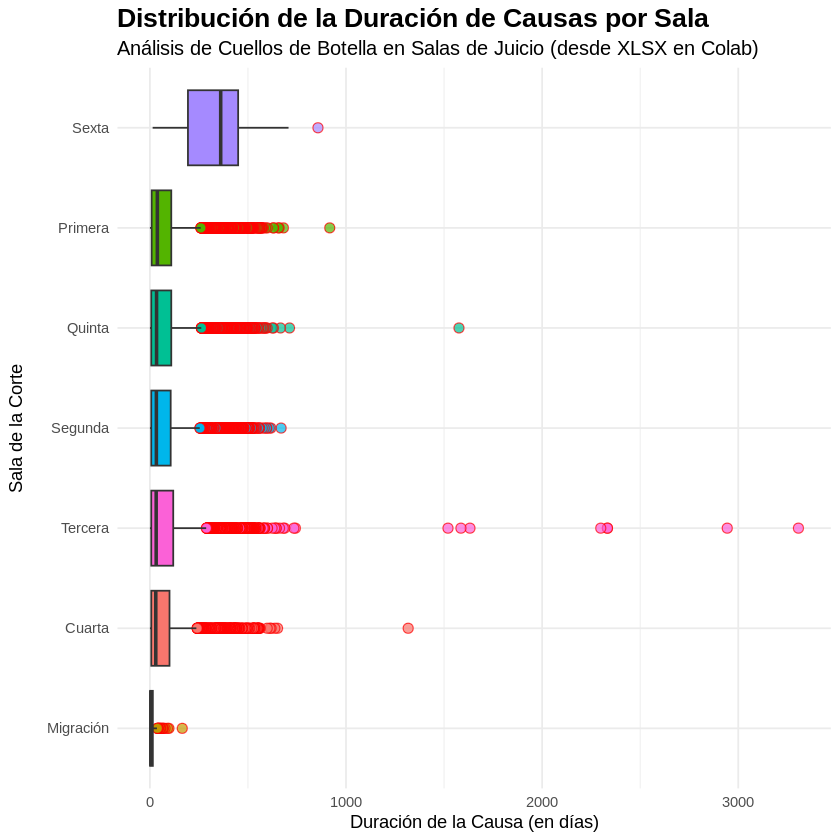

In [ ]:
# Cargar las librerías necesarias.
# readxl es para leer archivos .xlsx
# dplyr es para manipular los datos
# ggplot2 es para crear los gráficos
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

# --- PASO 1: Cargar los Datos desde el Archivo XLSX ---
# Define el nombre de tu archivo de Excel. Cambia "nombre_de_tu_archivo.xlsx" por el nombre real.
nombre_archivo <- "Duración Causas.xlsx"

tryCatch({
    # Leemos el archivo. Por defecto, read_excel() lee la primera hoja.
    # Si tus datos están en otra hoja, usa: read_excel(nombre_archivo, sheet = "NombreDeLaHoja")
    dataset <- read_excel(nombre_archivo)

    print("Archivo XLSX cargado correctamente. Primeras filas:")
    # Usamos glimpse() que es como head() pero más informativo para dataframes.
    glimpse(dataset)
}, error = function(e) {
    print(paste("Error al cargar el archivo:", e$message))
    print("Verifica que el nombre del archivo sea correcto y que el archivo esté subido a la sesión de Colab.")
})

# --- PASO 2: Preparación de los Datos (Igual que antes) ---
# Asegurémonos de que las columnas tengan los tipos correctos.
# A veces, R puede leer números como texto. Lo forzamos a ser numérico.
# readxl es bastante bueno detectando tipos, pero es una buena práctica verificar.
dataset$DURACION <- as.numeric(dataset$DURACION)
dataset$GLS_SALA <- as.character(dataset$GLS_SALA)


# Definimos las salas que son de juicio para una comparación justa.
salas_de_juicio <- c("Primera", "Segunda", "Tercera", "Cuarta", "Quinta", "Sexta", "Migración")

# Filtramos el dataset para quedarnos solo con las salas de juicio.
dataset_filtrado <- dataset %>%
  filter(GLS_SALA %in% salas_de_juicio) %>%
  # Es buena práctica remover filas donde DURACION no sea un número válido (NA)
  filter(!is.na(DURACION))


# --- PASO 3: Creación del Gráfico (Código idéntico) ---
# Este código no cambia, ya que opera sobre el dataframe 'dataset_filtrado'.

ggplot(dataset_filtrado, aes(x = reorder(GLS_SALA, DURACION, FUN = median), y = DURACION, fill = GLS_SALA)) +
  geom_boxplot(
    outlier.color = "red",
    outlier.shape = 21,
    outlier.size = 2.5,
    outlier.alpha = 0.7
  ) +
  coord_flip() +
  labs(
    title = "Distribución de la Duración de Causas por Sala",
    subtitle = "Análisis de Cuellos de Botella en Salas de Juicio (desde XLSX en Colab)",
    x = "Sala de la Corte",
    y = "Duración de la Causa (en días)"
  ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12)
  )

Picking joint bandwidth of 15.6



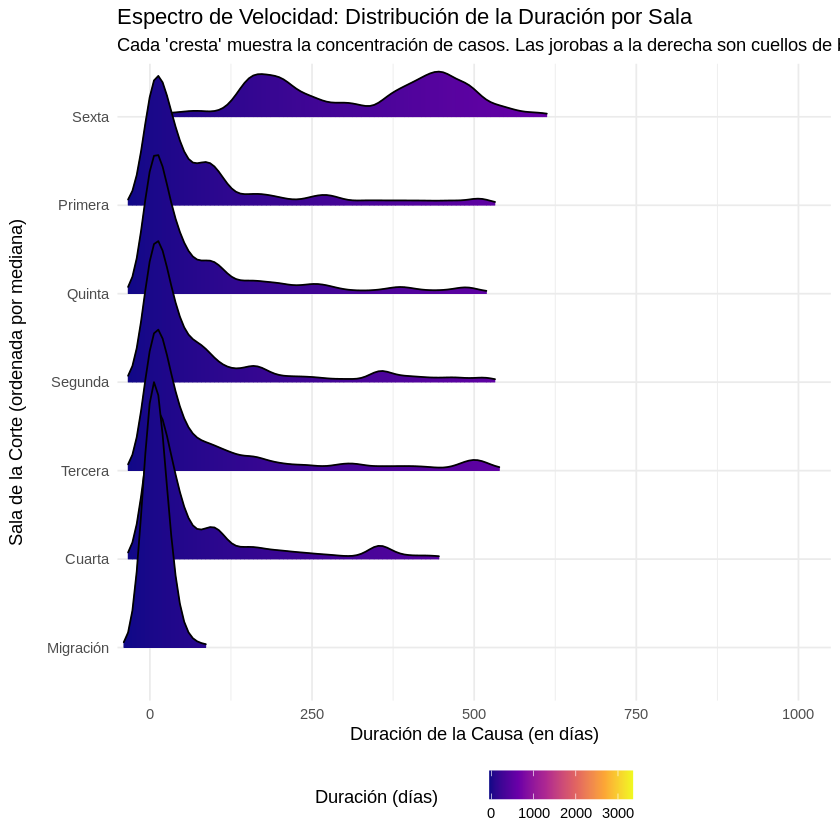

In [ ]:
# --- (Asegúrate de haber cargado y filtrado tu 'dataset' como en el paso anterior) ---

# Instalamos ggridges para un visual más atractivo, si no está disponible
if (!require("ggridges")) install.packages("ggridges")
library(ggridges)

# Gráfico de crestas de densidad (Joy Plot)
# Es una forma más avanzada y visualmente impactante de ver la densidad
ggplot(dataset_filtrado, aes(x = DURACION, y = reorder(GLS_SALA, DURACION, FUN = median), fill = ..x..)) +
  geom_density_ridges_gradient(scale = 3, rel_min_height = 0.01) +
  scale_fill_viridis_c(name = "Duración (días)", option = "C") +
  labs(
    title = "Espectro de Velocidad: Distribución de la Duración por Sala",
    subtitle = "Cada 'cresta' muestra la concentración de casos. Las jorobas a la derecha son cuellos de botella.",
    x = "Duración de la Causa (en días)",
    y = "Sala de la Corte (ordenada por mediana)"
  ) +
  # Limitamos el eje x para hacer un "zoom" en el área de mayor interés y evitar que los outliers extremos aplasten el gráfico
  coord_cartesian(xlim = c(0, 1000)) +
  theme_minimal() +
  theme(legend.position = "bottom")

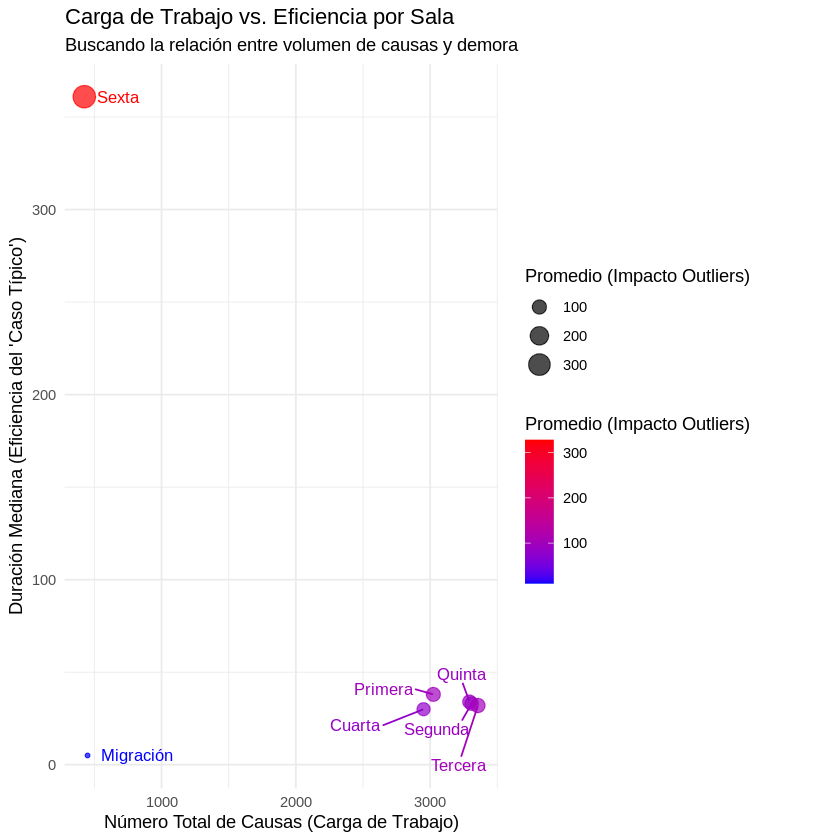

In [ ]:
# --- (Usa el mismo 'dataset_filtrado' de antes) ---

# Instalamos ggrepel para que las etiquetas no se superpongan
if (!require("ggrepel")) install.packages("ggrepel")
library(ggrepel)

# PASO A: Creamos una tabla resumen con las métricas que necesitamos
resumen_salas <- dataset_filtrado %>%
  group_by(GLS_SALA) %>%
  summarise(
    Carga_Total = n(), # Contamos el número de causas
    Duracion_Mediana = median(DURACION, na.rm = TRUE),
    Duracion_Promedio = mean(DURACION, na.rm = TRUE)
  )

# PASO B: Creamos el gráfico de dispersión
ggplot(resumen_salas, aes(x = Carga_Total, y = Duracion_Mediana, color = Duracion_Promedio)) +
  geom_point(aes(size = Duracion_Promedio), alpha = 0.7) +
  geom_text_repel(aes(label = GLS_SALA), size = 3.5, box.padding = 0.5) +
  scale_color_gradient(low = "blue", high = "red") +
  labs(
    title = "Carga de Trabajo vs. Eficiencia por Sala",
    subtitle = "Buscando la relación entre volumen de causas y demora",
    x = "Número Total de Causas (Carga de Trabajo)",
    y = "Duración Mediana (Eficiencia del 'Caso Típico')",
    color = "Promedio (Impacto Outliers)",
    size = "Promedio (Impacto Outliers)"
  ) +
  theme_minimal()

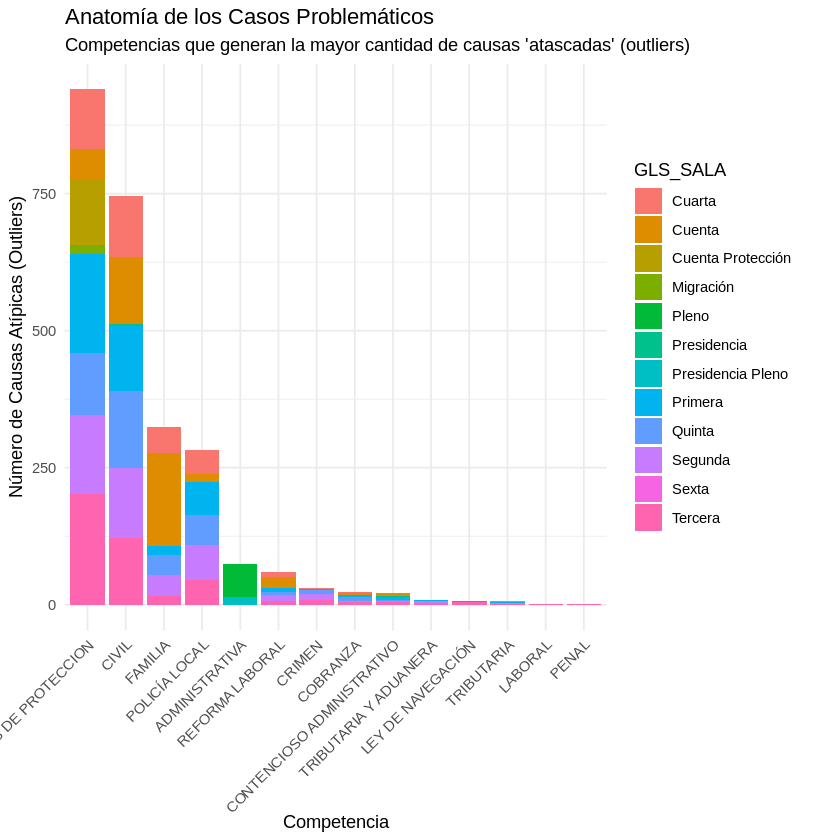

In [ ]:
# --- (Usa el 'dataset' original, antes de filtrar salas) ---

# PASO A: Identificamos los outliers por CADA SALA
outliers_df <- dataset %>%
  group_by(GLS_SALA) %>%
  mutate(
    Q1 = quantile(DURACION, 0.25, na.rm = TRUE),
    Q3 = quantile(DURACION, 0.75, na.rm = TRUE),
    IQR = Q3 - Q1,
    limite_superior = Q3 + 1.5 * IQR,
    es_outlier = DURACION > limite_superior
  ) %>%
  ungroup() %>%
  filter(es_outlier == TRUE) # Nos quedamos SOLO con los outliers

# PASO B: Creamos un gráfico de barras para ver qué sala y competencia generan más outliers
ggplot(outliers_df, aes(x = reorder(COMPETENCIA, COMPETENCIA, function(x)-length(x)), fill = GLS_SALA)) +
  geom_bar() +
  labs(
    title = "Anatomía de los Casos Problemáticos",
    subtitle = "Competencias que generan la mayor cantidad de causas 'atascadas' (outliers)",
    x = "Competencia",
    y = "Número de Causas Atípicas (Outliers)"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

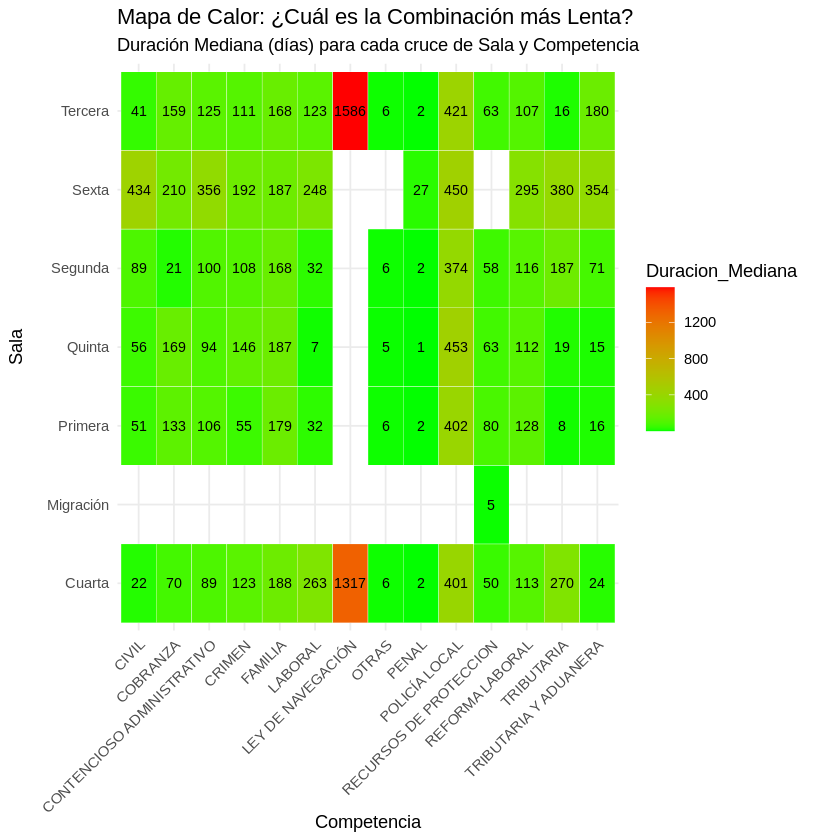

In [ ]:
# --- (Usa el 'dataset_filtrado' de las salas de juicio) ---

# PASO A: Creamos una tabla resumen
heatmap_data <- dataset_filtrado %>%
  group_by(GLS_SALA, COMPETENCIA) %>%
  summarise(Duracion_Mediana = median(DURACION, na.rm = TRUE), .groups = 'drop') %>%
  filter(!is.na(Duracion_Mediana)) # Quitamos combinaciones sin datos

# PASO B: Creamos el heatmap
ggplot(heatmap_data, aes(x = COMPETENCIA, y = GLS_SALA, fill = Duracion_Mediana)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(Duracion_Mediana)), color = "black", size = 3) +
  scale_fill_gradient(low = "green", high = "red") +
  labs(
    title = "Mapa de Calor: ¿Cuál es la Combinación más Lenta?",
    subtitle = "Duración Mediana (días) para cada cruce de Sala y Competencia",
    x = "Competencia",
    y = "Sala"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))